<a href="https://colab.research.google.com/github/GhassenSmaoui/iris/blob/master/Iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting by importing the needed libraries 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing Tensorflow 2.0

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Then import the necessairy functions from scikit learn API such as the load_iris funtion to load the pre-existing dataset, train_test_split to plit the data into a training set and a test set and the proprocessing funtcion to normalize the data in order for the model to converge faster 

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
iris = load_iris()
iris['target'].shape
iris.data.shape

(150, 4)

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

as mentionned in the secription of the dataset: 

*   0 represents satosa
*   1 represents versicolor
*   2 represents virginica



In [0]:
Y = tf.keras.utils.to_categorical(iris['target'], dtype='int')

In [0]:
X_train, X_test , Y_train , Y_test = train_test_split(preprocessing.scale(iris['data']), Y, random_state = 0)

The below cell introduces a function that transforms the target to categorical type of data that is used for multiclass classification

In [0]:
Y_train

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 8, input_shape = [4], activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(3, input_shape = [8], activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy'
             )

In [13]:
Y_train.shape

(112, 3)

In [14]:
#model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(X_train, Y_train, epochs=1000,  verbose=False)
print("Finished training the model")

Finished training the model


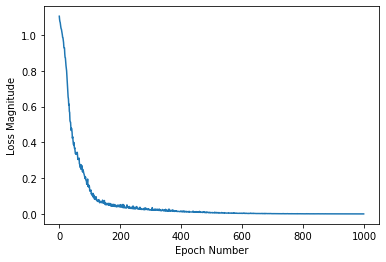

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [0]:
 train_prediction = model.predict(X_train)
 train_prediction_integer = np.zeros(train_prediction.shape, dtype=int)

In [0]:
for i in range(train_prediction.shape[0]):
  train_prediction_integer[i,np.argmax(train_prediction[i])] = 1

In [18]:
inc = 0
for i in range(Y_train.shape[0]):
  if np.array_equal(Y_train[i], train_prediction_integer[i]):
    inc +=1
performance_value = (inc /Y_train.shape[0])*100
print (performance_value) 

100.0


In [19]:
Y_test[0:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [0]:
 test_prediction = model.predict(X_test)
 test_prediction_integer = np.zeros(test_prediction.shape, dtype=int)

In [0]:
for i in range(test_prediction.shape[0]):
  test_prediction_integer[i,np.argmax(test_prediction[i])] = 1

In [22]:
inc = 0
for i in range(Y_test.shape[0]):
  if np.array_equal(Y_test[i], test_prediction_integer[i]):
    inc +=1
test_performance_value = (inc /Y_test.shape[0])*100
print (test_performance_value) 

97.36842105263158


In [25]:
#Accuracy of the predicted values in the train set
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_train,train_prediction_integer))
#print(confusion_matrix(Y_test,test_prediction_integer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

   micro avg       1.00      1.00      1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112
 samples avg       1.00      1.00      1.00       112



In [26]:

#Accuracy of the predicted values in the test set
print(classification_report(Y_test,test_prediction_integer))
#print(confusion_matrix(Y_test,test_prediction_integer))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38

